<a href="https://colab.research.google.com/github/sohumgautam17/nexus_ai_coursework/blob/main/Multi_Layer_Perception_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Statements
We need to import all the libraries we will be using for our PyTorch-based neural network implementation:

>First, we import `torch`, which is the core PyTorch library. This is our fundamental package for deep learning, providing the foundation for all tensor operations and computations we'll perform.

>From PyTorch, we specifically import `nn` (neural networks). This module contains all the building blocks we need to create neural networks, including layers, activation functions, and loss functions, etc.

>`torchvision` is imported along with its submodules: datasets and transforms. This package is essential for computer vision tasks - datasets gives us access to common datasets like MNIST or CIFAR-10, while transforms helps us preprocess our images with operations like converting them to tensors.

>Finally, we import `matplotlib` for creating visualizations. We import it twice - once as plt and once with specific plotting functions - to ensure we have access to all plotting capabilities.


###We will cover other imports as we go

The last line prints our PyTorch version, which is useful for documentation and reproducibility purposes.





In [ ]:
import torch
from torch import nn # This imports the neural network library (All the features we need are here)

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Subset, Dataset

from torchsummary import summary
from tqdm import tqdm

import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

2.5.1+cu121


# Insert Infographic for the DL Workflow


#Loading the Fasion MNist Dataset from PyTorch torchvision (Step 1)
The first step of the project is to load the data we want to use
Fashion-MNIST is a modern alternative to the traditional MNIST dataset, created by Zalando's research team. Here are its key characteristics:

1. The dataset consists of `70,000` grayscale images of clothing items and accessories:
>60,000 training images
>10,000 test images

2. Each image is 28x28 pixels in grayscale format, making them relatively small and manageable for training

3. The dataset contains 10 different classes of fashion items, labeled from 0 to 9:
>0: T-shirt/top;
>1: Trouser;
>2: Pullover;
>3: Dress;
>4: Coat;
>5: Sandal;
>6: Shirt;
>7: Sneaker;
>8: Bag;
>9: Ankle boot

4. Each class has exactly 6,000 training images and 1,000 test images, making it a perfectly balanced dataset

For more info visit: https://github.com/zalandoresearch/fashion-mnist

![An Image](https://datasets.activeloop.ai/wp-content/uploads/2022/09/Fashion-MNIST-dataset-Activeloop-Platform-visualization-image.webp)

In [ ]:
train_data = datasets.FashionMNIST(
    root='data',
    train= True,
    download=True,
    transform=ToTensor(), # form image PIL format to Torch tensor
    target_transform=None, # for labels
  )

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
  )

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 199kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.77MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.06MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Inspect the dataset (Step 2)


In [ ]:
print(f'Length of the train dataset: {len(train_data)} | Shape of train data {train_data.data.shape}')
print(f'Length of the train dataset: {len(test_data)} | Shape of train data {test_data.data.shape}')

Length of the train dataset: 60000 | Shape of train data torch.Size([60000, 28, 28])
Length of the train dataset: 10000 | Shape of train data torch.Size([10000, 28, 28])


In [ ]:
print(f'There are {len(train_data.classes)} classes (clothing items) in the dataset')
print(f'These are the classes: {train_data.classes}')

There are 10 classes (clothing items) in the dataset
These are the classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


The train dataset is a list (60000 items) of tuples (Image, class/label)
> SO... the first 0 indexes the 1st tuple out of 60000 and the 2nd 0 indexes the image (If you index 1 you will get the class number)

In [ ]:
print(f'Shape of the first image: {train_data[0][0].shape}') # The first zero indexes the tuple, the next indexes the image in the tuple
print(f'The class of the first image: {train_data[0][1]}')

Shape of the first image: torch.Size([1, 28, 28])
The class of the first image: 9


##Visualize

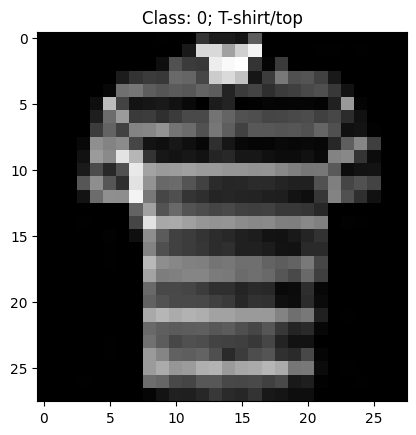

In [ ]:
image_num = 9233 #@param {type:"raw"}
plt.imshow(train_data[image_num][0].squeeze(0), cmap='gray') # Visuzlizing grey scale images --> matplotlib takes (H x W), so we need to get rid of the 1 in (1, 28, 28) to make it (28, 28)
plt.title(f'Class: {train_data[image_num][1]}; {train_data.classes[train_data[image_num][1]]}')
plt.show()

# Building the Model (Step 3)


Nice visualization tool: https://alexlenail.me/NN-SVG/index.html


![An Image](https://cdn.botpenguin.com/assets/website/Deep_Neural_Network_2b9d9075e9.webp)

In [ ]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self, input_features=784, output=10):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=input_features, out_features=256)
    self.layer_2 = nn.Linear(in_features=256, out_features=128)
    self.layer_3 = nn.Linear(in_features=128, out_features=32)
    self.output = nn.Linear(in_features=32, out_features=output)

  def forward(self, x):
    x = self.relu(self.layer_1(x))
    x = self.relu(self.layer_2(x))
    x = self.relu(self.layer_3(x))
    x = self.output(x)
    return x

## An easier way to do this is by using the Sequential API
This way in the forward function we only have to call self.(name_of_layers) attribute

In [ ]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_features=784, output=10):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_features, 256),
            nn.Linear(256, 128),
            nn.Linear(128, 32),
            nn.Linear(32, output)
        )

    def forward(self, x):
        return self.layers(x)


model = MultiLayerPerceptron()

In [ ]:
summary(model, input_size=(1, 28, 28)) # We enter 784 because when we flatten the 28x28 image we get 784 pixel values

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
            Linear-3                  [-1, 128]          32,896
            Linear-4                   [-1, 32]           4,128
            Linear-5                   [-1, 10]             330
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.91
Estimated Total Size (MB): 0.92
----------------------------------------------------------------


#Training the Model
1. Take the train_data as input (This includes the image and the class label)
2. Make a Prediction with the Model
3. See how right/wrong the prediction was w/ the loss function
4. Update the model parameters to do better next time

Feeding all 60,000 training images into our model at once would be like trying to eat an entire pizza in one bite - it's overwhelming and inefficient. Instead, we use DataLoader to break our data into manageable "bites" (batches) of 32 images each:

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
images, labels = next(iter(train_dataloader))
print(f'Shape of the images: {images.shape}')
print(f'Shape of the labels: {labels.shape}')
print(f'Number of batches is: {len(iter(train_dataloader))}') # 60 x 1875 = 60000

Shape of the images: torch.Size([32, 1, 28, 28])
Shape of the labels: torch.Size([32])
Number of batches is: 1875


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [ ]:
def train_loop(train_dataloader, model, loss_fn, optimizer, epochs):
  model.train() # Put the model in training mode
  train_loss = []
  for epoch in range(epochs):
    train_loss_epoch = 0
    for image, label in tqdm(train_dataloader, desc="Training Model"): # tqdm means "progress" in Arabic
      optimizer.zero_grad()

      pred = model(image)
      loss = loss_fn(pred, label) # Prediction has to go first (Calculate loss between the prediction and the true value)
      loss.backward()
      train_loss_epoch += loss.item()

      optimizer.step()

    avg_loss = train_loss_epoch / len(train_dataloader)
    train_loss.append(avg_loss)

    print(f'Epoch: {epoch+1} | Loss: {avg_loss:.4f}')

  return train_loss


In [ ]:
losses = train_loop(train_dataloader, model, loss_fn, optimizer, epochs=25) # Lets take a few minute break while it trains and we will come back

Training Model: 100%|██████████| 1875/1875 [00:20<00:00, 92.05it/s] 


Epoch: 1 | Loss: 6.2076


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 102.91it/s]


Epoch: 2 | Loss: 0.5445


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 96.98it/s] 


Epoch: 3 | Loss: 0.5085


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 95.12it/s] 


Epoch: 4 | Loss: 0.5621


Training Model: 100%|██████████| 1875/1875 [00:20<00:00, 91.94it/s]


Epoch: 5 | Loss: 10.9282


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 101.06it/s]


Epoch: 6 | Loss: 0.5782


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 96.25it/s] 


Epoch: 7 | Loss: 0.5090


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 102.16it/s]


Epoch: 8 | Loss: 0.5419


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 96.65it/s]


Epoch: 9 | Loss: 7.8651


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 98.62it/s] 


Epoch: 10 | Loss: 1.6630


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 98.85it/s]


Epoch: 11 | Loss: 0.4883


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 98.47it/s] 


Epoch: 12 | Loss: 0.5137


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 103.49it/s]


Epoch: 13 | Loss: 0.5572


Training Model: 100%|██████████| 1875/1875 [00:20<00:00, 93.17it/s]


Epoch: 14 | Loss: 12.4970


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 103.27it/s]


Epoch: 15 | Loss: 0.6674


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 97.58it/s] 


Epoch: 16 | Loss: 0.5005


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 101.56it/s]


Epoch: 17 | Loss: 0.5058


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 98.52it/s] 


Epoch: 18 | Loss: 0.5347


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 94.88it/s]


Epoch: 19 | Loss: 6.5452


Training Model: 100%|██████████| 1875/1875 [00:20<00:00, 91.84it/s] 


Epoch: 20 | Loss: 0.5173


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 99.87it/s] 


Epoch: 21 | Loss: 0.4870


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 94.45it/s] 


Epoch: 22 | Loss: 0.5302


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 94.38it/s] 


Epoch: 23 | Loss: 10.0816


Training Model: 100%|██████████| 1875/1875 [00:19<00:00, 95.52it/s]


Epoch: 24 | Loss: 0.6809


Training Model: 100%|██████████| 1875/1875 [00:18<00:00, 101.05it/s]

Epoch: 25 | Loss: 0.4899


In [ ]:
print(losses)

[6.207615494771798, 0.5445043038407962, 0.5084838258504868, 0.5620799442927042, 10.928162309904893, 0.578213400332133, 0.5089767976045608, 0.5418915134906769, 7.865133950519562, 1.6630352827270827, 0.48829293254613876, 0.5136801134824753, 0.5571704248627027, 12.496993538139265, 0.6674356448610623, 0.5004944233139356, 0.5058229506492615, 0.5346792079607645, 6.545197685345014, 0.5172770857493083, 0.4870087222337723, 0.530237787214915, 10.081575169640779, 0.68092298664848, 0.4898692465265592]


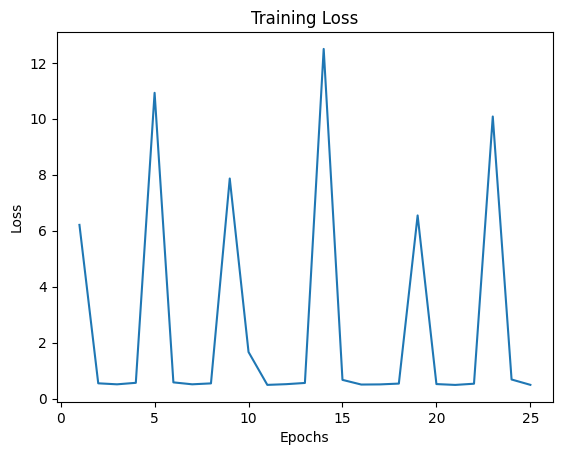

In [ ]:
epoch_list = list(range(1, 26))
plt.plot(epoch_list, losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Testing the model
The model has now been trained on our dataset, so now it is time to see how it performs on data it has never seen before

In [ ]:
def accuracy(correct, total):
  return correct/total * 100

In [ ]:
def test_loop(test_dataloader, model):
  model.eval() # Put the model in evaluation mode
  correct = 0
  total = 0

  with torch.no_grad():
    for image, label in tqdm(test_dataloader, desc="Testing Model"):
      pred = model(image)

      correct += (pred.argmax(1) == label).type(torch.float).sum().item()
      total += len(label)

    print(f'Accuracy: {accuracy(correct, total)}')

In [ ]:
test_loop(test_dataloader, model)

Testing Model: 100%|██████████| 313/313 [00:01<00:00, 168.80it/s]

Accuracy: 82.73


#Visualize Testing

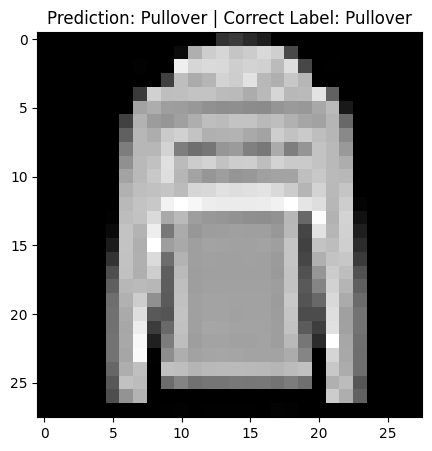

In [ ]:
rand_idx = torch.randint(0, len(test_data), (1,)).item()
image, label = test_data[rand_idx]

prediction = model(image)

# Get the predicted class index
pred_idx = prediction[0].argmax().item()  # For first image in batch

plt.figure(figsize=(5,5))
plt.title(f'Prediction: {test_data.classes[pred_idx]} | Correct Label: {test_data.classes[label]}')
plt.imshow(image[0].squeeze(), cmap='gray')  # Show first image in batch
plt.show()

#Hyperparameter Tuning
1. Change Learning Rate And see if the accuracy improves
2. Play with the number of epochs and see when the loss converges
3. Try adding more layers to the neural network
